## What is this?
    This is a python program for predicting heat generated in some machine according to sensor data provided in the file main.csv. main.csv contains:
        1. Time
        2. Day_Of_Year
        3. TT_16: temperature sensor
        4. PYNM_02: temperature sensor
        5. TT_11: temperature sensor
        6. FT_02: flow rate sensor
        7. Wind_Velocity
        8. HG_ARRAY_02: heat generated in machine.
        
    We have to predict HG_ARRAY_02, with all other columns as inputs. We have used four machine learning methods to achieve this:
        1. KNN: K-Nearest Neighbours
        2. LR: Linear Regression
        3. QR: Quadratic Regression
        4. NN: Neural Networks
## Steps followed
    1. Importing the data
    2. Making plots for analysis
    3. Removing unneeded data
    4. Filling in missing data
    5. Making the same plots again for analysis
    6. Predicting HG_ARRAY_02 using KNN
    7. Predicting HG_ARRAY_02 using LR
    8. Predicting HG_ARRAY_02 using QR
    9. Predicting HG_ARRAY_02 using NN

In [2]:
# Importing libraries
import pandas as pd # for handling databases
import numpy as np # standard mathematical library
import time # time calculation
import seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

# Importing data

In [3]:
# Loading data
df = pd.read_csv('./main.csv')
df.head()

,Time,Day_Of_Year,TT_16,PYNM_02,TT_11,FT_02,Wind_Velocity,HG_ARRAY_02
0,9/10/17,253,NaN,214.888060,59.392413,19.289717,35.5,1598.338740
1,9/11/17,254,NaN,189.933333,53.716667,19.225000,35.5,1222.361000
2,9/12/17,255,NaN,NaN,NaN,NaN,NaN,NaN
3,9/13/17,256,NaN,NaN,NaN,NaN,NaN,NaN
4,9/14/17,257,NaN,96.169219,53.576433,19.176324,35.5,3250.427007


In [4]:
df['Time'] = pd.to_datetime(df['Time']) # conversion of datatype of a row
print(df.info(), '\n')
print('Shape:', df.shape) # number of rows and columns of the database
df.describe() # mathematical information of int and float columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
Time             380 non-null datetime64[ns]
Day_Of_Year      380 non-null int64
TT_16            320 non-null float64
PYNM_02          281 non-null float64
TT_11            346 non-null float64
FT_02            317 non-null float64
Wind_Velocity    141 non-null float64
HG_ARRAY_02      317 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 23.8 KB
None 

Shape: (380, 8)


,Day_Of_Year,TT_16,PYNM_02,TT_11,FT_02,Wind_Velocity,HG_ARRAY_02
count,380.000000,320.000000,281.000000,346.000000,317.000000,141.000000,317.000000
mean,186.039474,36.974279,207.002671,44.318522,16.284703,6.334623,2406.423130
std,104.489391,7.447439,109.232638,8.440823,5.683094,6.370754,988.790052
min,1.000000,10.228881,0.369346,13.459877,0.001083,2.846667,0.059000
25%,95.750000,32.612818,121.771422,39.107805,18.545000,3.897917,2051.504053
50%,190.500000,38.562039,192.711513,45.577744,18.808374,4.889875,2702.602761
75%,270.250000,42.333324,300.745522,50.011727,18.875271,6.183125,3142.004482
max,365.000000,59.021930,572.164179,71.519737,19.289717,35.841667,4396.358658


## Plots with raw data

TT_16               AxesSubplot(0.125,0.125;0.110714x0.755)
PYNM_02          AxesSubplot(0.257857,0.125;0.110714x0.755)
TT_11            AxesSubplot(0.390714,0.125;0.110714x0.755)
FT_02            AxesSubplot(0.523571,0.125;0.110714x0.755)
Wind_Velocity    AxesSubplot(0.656429,0.125;0.110714x0.755)
HG_ARRAY_02      AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

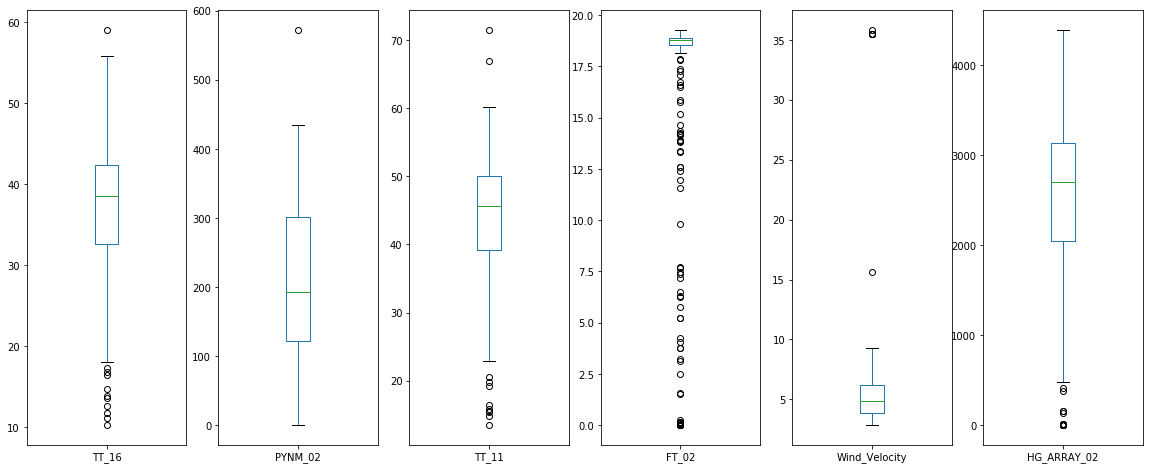

In [4]:
df.loc[:, 'TT_16':].plot(kind = 'box', subplots = True, figsize = (20, 8)) # for a sub-dataframe, plotting a box plot

/home/subodhsondkar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/subodhsondkar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


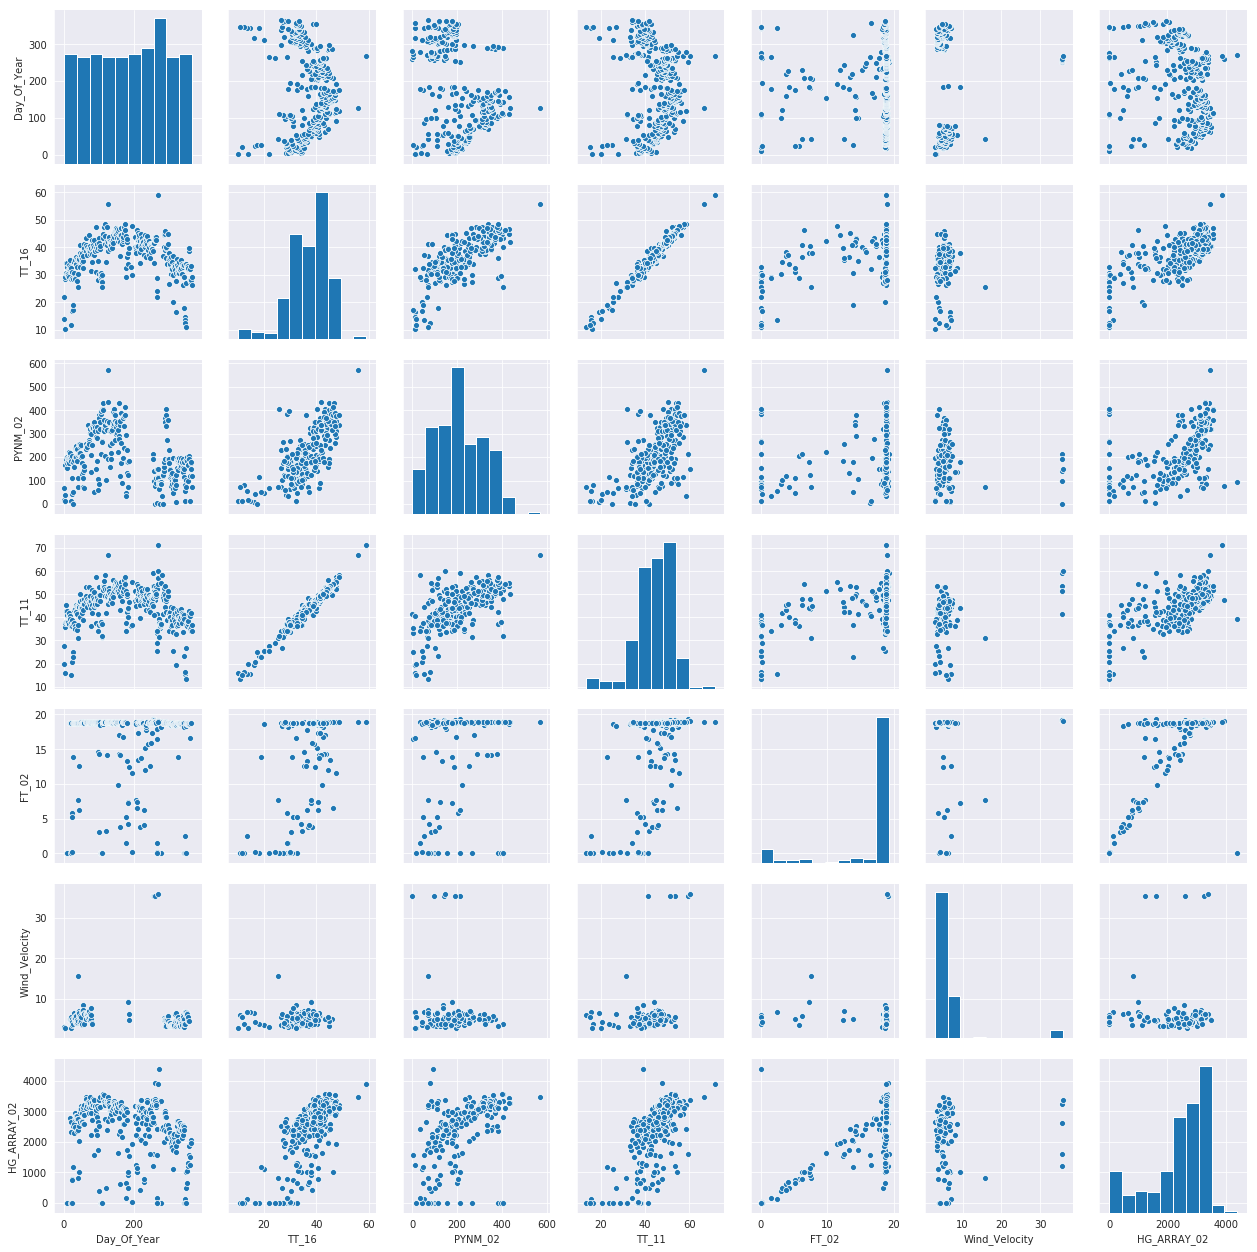

In [5]:
# Pairplot
sns.set_style("darkgrid")
sns.pairplot(df, hue = None, kind = "scatter")
plt.show()

# Data cleaning

In [ ]:
dft = df.copy()
# Removing phaaltu rows and columns
dft.drop(dft[dft.isnull().sum(axis = 1) > 3].index, axis = 0, inplace = True) # all rows with more than three columns missing
dft.drop(dft[dft['HG_ARRAY_02'].isnull()].index, axis = 0, inplace = True) # output missing
dft.drop(dft[dft['HG_ARRAY_02'] < 500].index, axis = 0, inplace = True) # outlying outputs
dft.drop(dft[dft['Wind_Velocity'] > 10].index, axis = 0, inplace = True) # outlying inputs
dft.drop([17], axis = 0, inplace = True)
print('Shape:', dft.shape)
dft.describe()

In [ ]:
# Filling missing values by using current database metrics
for index, row in dft[dft['Wind_Velocity'].isnull()].iterrows():
    dft.loc[index, 'Wind_Velocity'] = np.random.normal(dft['Wind_Velocity'].mean(), dft['Wind_Velocity'].std())
for index, row in dft[dft['TT_16'].isnull()].iterrows():
    dft.loc[index, 'TT_16'] = dft.loc[index, 'TT_11'] + np.random.normal((dft['TT_16'] - dft['TT_11']).mean(), (dft['TT_16'] - dft['TT_11']).std())
for index, row in dft[dft['PYNM_02'].isnull()].iterrows():
    dft.loc[index, 'PYNM_02'] = np.random.normal(dft['PYNM_02'].mean(), dft['PYNM_02'].std())
print('Shape:', dft.shape)
dft.describe()

## Data Analysis

In [ ]:
# Scatter plot of inputs vs output
for i in range(5):
    sns.set_style("darkgrid")
    sns.FacetGrid(dft, hue = None, height = 5)\
        .map(plt.scatter, df.columns[i + 2], "HG_ARRAY_02")\
        .add_legend()
    plt.show()

In [ ]:
# New box plots
dft.loc[:, 'TT_16':].plot(kind = 'box', subplots = True, figsize = (20, 8))

# Machine Learning

## KNN

In [ ]:
ds = dft.values
traindata, trainanswers, testdata, testanswers = ds[:200, 2:7], ds[:200, 7], ds[200:, 2:7], ds[200:, 7]
# Euclidean distance function
def distance(d1, d2):
    dist = 0
    for i in range(len(d1)):
        dist += np.square(d1[i] - d2[i])
    return dist
print('Root Mean Square Error (Testing):')
for k in range(1, 16):
    testpredictions = [] # stores the average values for metrics
    for i in range(len(testdata)): # for each test datapoint
        distances = [] # stores distances from each data point
        for j in range(len(traindata)):
            distances += [[j, distance(traindata[j], testdata[i])]]
        sorteddistances = sorted(distances, key = lambda l: l[1]) # sorting distances
        answer = 0
        for j in range(k):
            answer += trainanswers[sorteddistances[j][0]] # adding top k values
        testpredictions += [answer / k] # storing mean
    rmse = 0
    for i in range(len(testanswers)):
        rmse += np.square(testanswers[i] - testpredictions[i])
    rmse /= len(testanswers)
    rmse = np.sqrt(rmse)
    print('\tfor K =', k, ':', rmse)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
traindata, testdata, trainanswers, testanswers = train_test_split(
    dft.iloc[:, 2:7], dft.iloc[:, 7], test_size = 0.3) # splitting
model = LinearRegression() # base model
model.fit(traindata, trainanswers) # fitting train data
trainpredictions = model.predict(traindata) # predictions on train data for metrics
y = 0
for i in range(len(trainpredictions)):
    if trainanswers.values[i] - trainpredictions[i] > 1000 or trainanswers.values[i] - trainpredictions[i] < -1000:
        print(trainanswers.index[i], '->', trainanswers.values[i] - trainpredictions[i], '\n')
trainmse, trainr2 = mean_squared_error(trainanswers, trainpredictions), r2_score(trainanswers, trainpredictions) # metrics
print('TRAINING')
print('--------')
print('Root Mean Square Error (Training):', np.sqrt(trainmse))
print('R-square Score (Training):', trainr2)
plt.scatter(trainpredictions, trainanswers - trainpredictions, s = 8)
plt.plot([0, 4500], [0, 0])
plt.show()
print('x-axis: Predicted value, y-axis: Actual value - Predicted value')
testpredictions = model.predict(testdata) # predictions on test data
testmse, testr2 = mean_squared_error(testanswers, testpredictions), r2_score(testanswers, testpredictions) # metrics
for i in range(len(testpredictions)):
    if testanswers.values[i] - testpredictions[i] > 1000 or testanswers.values[i] - testpredictions[i] < -1000:
        print(testanswers.index[i], '->', testanswers.values[i] - testpredictions[i], '\n')
print('\n\nTESTING')
print('-------')
print('Root Mean Square Error (Testing):', np.sqrt(testmse))
print('R-square Score (Testing):', testr2)
plt.scatter(testpredictions, testanswers - testpredictions, s = 8)
plt.plot([0, 4500], [0, 0])
plt.show()
print('x-axis: Predicted value, y-axis: Actual value - Predicted value')

## Quadratic Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# same as linear
traindata, testdata, trainanswers, testanswers = train_test_split(
    dft.iloc[:, 2:7], dft.iloc[:, 7], test_size = 0.2)
# only difference is the next line, setting coeffecients for given degree
polytraindata, polytestdata = PolynomialFeatures(degree = 2).fit_transform(traindata), PolynomialFeatures(degree = 2).fit_transform(testdata)
model = LinearRegression()
model.fit(polytraindata, trainanswers)
polypredictions = model.predict(polytraindata)
trainrmse, trainr2 = np.sqrt(mean_squared_error(polypredictions, trainanswers)), r2_score(polypredictions, trainanswers)
print('TRAINING')
print('--------')
print('Root Mean Square Error (Training):', trainrmse)
print('R-square Score (Training):', trainr2)
plt.scatter(polypredictions, trainanswers - polypredictions, s = 8)
plt.plot([0, 4500], [0, 0])
plt.show()
polypredictions = model.predict(polytestdata)
testrmse, testr2 = np.sqrt(mean_squared_error(polypredictions, testanswers)), r2_score(polypredictions, testanswers)
print('TESTING')
print('-------')
print('Root Mean Square Error (Training):', testrmse)
print('R-square Score (Training):', testr2)
plt.scatter(polypredictions, testanswers - polypredictions, s = 8)
plt.plot([0, 4500], [0, 0])
plt.show()

## Neural Network

In [ ]:
import random
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
traindata, testdata, trainanswers, testanswers = train_test_split(
    dft.iloc[:, 2:7], dft.iloc[:, 7], test_size = 0.4)
i = 0
while i < 1:
    n1, n2 = random.randint(3, 20), random.randint(3, 20)
    lr = 'constant' if random.randint(0, 1) == 0 else 'adaptive'
    maxiter, iternochange = random.randint(20000, 60000), random.randint(4000, 12000)
    model = MLPRegressor(hidden_layer_sizes = (n1, n2,),
                         learning_rate = lr,
                         max_iter = maxiter,
                         verbose = False,
                         early_stopping = True,
                         validation_fraction = 0.2,
                         n_iter_no_change = iternochange)
    st = time.time()
    model.fit(traindata, trainanswers)
    et = time.time()
    trainpredictions = model.predict(traindata)
    trainr2 = r2_score(trainanswers, trainpredictions)
    testpredictions = model.predict(testdata)
    testr2 = r2_score(testanswers, testpredictions)
    print('Iteration', i, '\nSize of hidden layers:', n1, '|', n2, '\nLearning:', lr) 
    print('r2 value for training:', trainr2, '\nr2 value for testing:', testr2)
    print('Time:', et - st, 'seconds\nNumber of steps:', model.n_iter_)
    i += 1
    plt.scatter(trainpredictions, trainanswers - trainpredictions, s = 8)
    plt.scatter(testpredictions, testanswers - testpredictions, s = 8)
    plt.plot([0, 4500], [0, 0])
    plt.plot([0, 4500], [1000, 1000])
    plt.plot([0, 4500], [-1000, -1000])
    plt.show()